# http://tau-data.id/umi/

<center><img alt="" src="images/0_Cover.jpg"/></center> 

## <center><font color="blue">Modul 10: Pendahuluan Social Network Analysis</font></center>
<b><center>(C) Taufik Sutanto - 2019</center>
<center>tau-data Indonesia ~ https://tau-data.id ~ taufik@tau-data.id</center>

## <center><font color="blue">Pendahuluan Social Network Analysis</font></center>
<img alt="" src="images/PDS_logo.jpg" />

# <font color="blue">Workshop Schedule</font>

## <font color="green">Hari ke-5 (Jumat, 30 Jan 2020)</font>

**Social Media & network Analysis**
* 09:00 – 11:00 	Topic Modelling
* 11:00 – 12:00	Latihan Topic Modelling
* 13:00 – 14:00	Pendahuluan Social Network Analytics
* 14:00 – 15.00	Centrality Analysis dan Community Detection
* 15:00 – 16.00	Latihan Centrality Analysis dan Community Detection 

Studi Kasus: **Sentiment Analysis dan Topic Modelling Kasus Banjir**


In [ ]:
# Installing Modules for Google Colab
!wget https://raw.githubusercontent.com/taufikedys/UMI/master/taudata.py
!mkdir data
!wget -P data/ https://raw.githubusercontent.com/taufikedys/UMI/master/data/Tweets.json
!wget -P data/ https://raw.githubusercontent.com/taufikedys/UMI/master/data/dataTweet.txt
!wget -P data/ https://raw.githubusercontent.com/taufikedys/UMI/master/data/slang.dic
!wget -P data/ https://raw.githubusercontent.com/taufikedys/UMI/master/data/stopwords_id.txt
!wget -P data/ https://raw.githubusercontent.com/taufikedys/UMI/master/data/stopwords_en.txt
!wget -P data/ https://raw.githubusercontent.com/taufikedys/UMI/master/data/all_indo_man_tag_corpus_model.crf.tagger
!wget -P data/ https://raw.githubusercontent.com/taufikedys/UMI/master/data/kata_dasar.txt
!pip install unidecode
!pip install pyLDAvis
!pip install textblob
!pip install sastrawi
!pip install graphviz
!pip install tweepy
!pip install twython
!pip install graphviz
!pip install spacy
!pip install python-crfsuite
!python -m spacy download en
!python -m spacy download xx
!python -m spacy download en_core_web_sm
import nltk
nltk.download('popular')

In [1]:
# Importing Modules untuk Notebook ini
import warnings; warnings.simplefilter('ignore')
import taudata as tau, itertools, re, pickle, pyLDAvis, pyLDAvis.sklearn, spacy, nltk, urllib.request
import time, numpy as np, matplotlib.pyplot as plt, networkx as nx, pandas as pd, seaborn as sns 
from matplotlib.colors import ListedColormap
from tqdm import tqdm_notebook as tqdm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.tag import CRFTagger
import networkx as nx
from graphviz import Digraph
from nltk.corpus import stopwords

pyLDAvis.enable_notebook()
sns.set(style="ticks", color_codes=True)
random_state = 170

## <font color="blue">Outline SNA :</font>
* Review Graph
* Centrality Analysis
* Graph Partitioning
* Community Detection
* Discussion on Final Project

<h1 id="Sejarah">Sejarah</h1>

<ul>
	<li>1736: Leonhard Euler - Basel, 1707-St. Petersburg, 1786</li>
	<li>Mampu mengungkap misteri Jembatan Konigsberg di Prussia (saat ini Kaliningrad, Russia) </li>
</ul>
<img alt="" src="images/Konigsberg_bridge.png" />

<h1 id="Graph">Graph (Definisi)</h1>

<ul>
	<ul>
		<li>Suatu Graph G adalah koleksi atau pasangan dari dua himpunan V dan E dengan</li>
		<li>V = V(G) = himpunan verteks atau simpul atau node.</li>
		<li>E = E(G) = himpunan edge atau ruas atau sisi.</li>
	</ul>
    <li><img alt="" src="images/contoh_graph.png" style="width: 700px; height: 326px;" /></li>
</ul>

<h1 id="Graph-Types">Graph Types</h1>

<p><img alt="" src="images/Tipe_Graph.png" style="width: 629px; height: 866px;" /></p>


<h1 id="Shortest-Path-and-Cycles">Shortest Path and Cycles</h1>

<p><img alt="" src="images/path_cycles.png" style="width: 800px; height: 342px;" /></p>


<h1 id="Degree/Derajat-Vertex">Degree/Derajat Vertex</h1>

<p><img alt="" src="images/degree_vertex_graph.png" style="width: 700px; height: 374px;" /></p>


<h1 id="Bipartite-Graph">Bipartite Graph</h1>

<p><img alt="" src="images/Graph_Bipartite.png" style="width: 800px; height: 407px;" /></p>


<h1 id="Graph-Representation">Graph Representation</h1>

<p><img alt="" src="images/adjacency_matrix.png" style="width: 800px; height: 516px;" /></p>


<p><img alt="" src="images/incidence_matrix.png" style="width: 800px; height: 469px;" /></p>


<h1 id="Graph-Isomorphism">Graph Isomorphism</h1>

<p><img alt="" src="images/isomorphic_graphs.png" style="width: 800px; height: 476px;" /></p>


<h1 id="Pemodelan-Graph-untuk-Penyelesaian-Masalah">Pemodelan Graph untuk Penyelesaian Masalah</h1>

<p><img alt="" src="images/Graph_Modelling.png" style="width: 800px; height: 496px;" /></p>


<h1 id="Graph-Applications">Graph Applications</h1>

<p><img alt="" src="images/graph_applications.png" style="width: 800px; height: 497px;" /></p>


<h1 id="Graph-in-Social-Media-Analytic">Graph in Social Media Analytic</h1>

<p><img alt="" src="images/SNA.png" style="width: 400px; height: 414px;" /></p>


## Tipe Graph

<center><img alt="" src="images/graph_types.png" />

## Tipe Graph di Python (NetworkX)
## 

<center><img alt="" src="images/graph_types_nx.png" />

In [2]:
# Di NetworkX: inisialisasi graph kosong dilakukan seperti ini:

G1 = nx.Graph() # Di kesempatan ini Graph tak Berarah ini yang akan lebih banyak kita gunakan
G2 = nx.DiGraph()
G3 = nx.MultiGraph()
G4 = nx.MultiDiGraph()

# Mari mulai dengan Membuat Graph Sederhana (Toy Data)

### 1. Mendefinisikan Graph
### 2. Menambahkan Vertex dan Edge
### 3. Graph Properties
### 4. Visualisasi Graph

In [3]:
# 1. Mendefinisikan Graph (kosong)
G = nx.Graph()
G

In [4]:
V = [1, 2, 7, 9, 12, 19] # Bisa juga string, misal "A" atau nama "Budi"
E = [(1,2), (2,19), (9,2), (9,1), (2,8), (8,10), (12,7),(7,2), (7,9)] # Perhatikan "8" dan "10" TIDAK ADA di V

G.add_nodes_from(V)
G.add_edges_from(E)

print('Banyak vertex = ', G.number_of_nodes())
print('Banyak Edges = ', G.number_of_edges())

Banyak vertex =  8
Banyak Edges =  9


## Visualisasi Graph

1. Graph mirip vector: tidak memiliki info lokasi
2. Maka pertama kali kita tentukan cara menggambar vertexnya dulu: pos (position)

<center><img alt="" src="images/nx_layouts.png" />

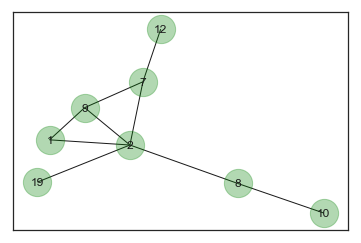

In [28]:
# Draw Graph # https://networkx.github.io/documentation/networkx-1.10/reference/drawing.html#layout

pos = nx.spring_layout(G) # Spring LayOut

nx.draw_networkx_nodes(G,pos, alpha=0.3,node_color='green',node_size=800) # Gambar Vertex
nx.draw_networkx_edges(G,pos,width=1) # Gambar edges
nx.draw_networkx_labels(G,pos) #Gambar Label Nodes
plt.show() # Show the graph

In [7]:
pos

{1: array([-0.39489199, -0.15113701]),
 2: array([-0.08471856, -0.05139193]),
 7: array([0.11494259, 0.51843992]),
 9: array([-0.21886783,  0.2748592 ]),
 12: array([0.35311557, 0.99406206]),
 19: array([-0.70540626, -0.00141673]),
 8: array([ 0.31316528, -0.58341552]),
 10: array([ 0.62266118, -1.        ])}

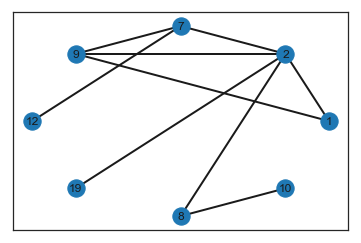

In [42]:
# Ingat Graph Isomorphism?
pos=nx.circular_layout(G) # Circular Layout

nx.draw_networkx_nodes(G,pos) # Gambar Vertex
nx.draw_networkx_edges(G,pos,width=2) # Gambar edges
nx.draw_networkx_labels(G,pos) #Gambar Label Nodes
plt.show() # Show the graph

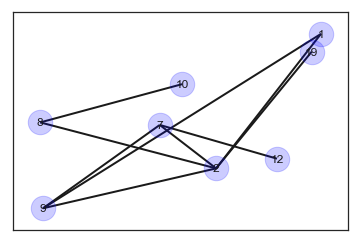

In [54]:
pos = nx.random_layout(G) # Random

nx.draw_networkx_nodes(G,pos, alpha=0.2,node_color='blue',node_size=600) # Gambar Vertex
nx.draw_networkx_edges(G,pos,width=2) # Gambar edges
nx.draw_networkx_labels(G,pos) #Gambar Label Nodes
plt.show() # Show the graph

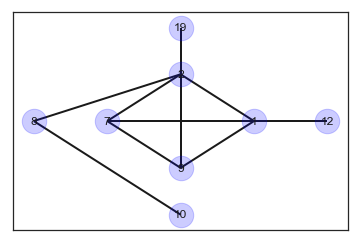

In [55]:
shell = [[1,2,7,9],[12,19,8,10]]
pos = nx.shell_layout(G, shell) # Shells

nx.draw_networkx_nodes(G,pos, alpha=0.2,node_color='blue',node_size=600) # Gambar Vertex
nx.draw_networkx_edges(G,pos,width=2) # Gambar edges
nx.draw_networkx_labels(G,pos) #Gambar Label Nodes
plt.show() # Show the graph

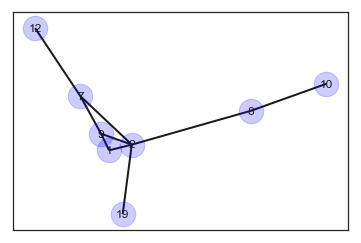

In [57]:
pos=nx.spectral_layout(G) # Spectral

nx.draw_networkx_nodes(G,pos, alpha=0.2,node_color='blue',node_size=600) # Gambar Vertex
nx.draw_networkx_edges(G,pos,width=2) # Gambar edges
nx.draw_networkx_labels(G,pos) #Gambar Label Nodes
plt.show() # Show the graph

## Untuk graphics Graph yang lebih baik lagi: **GraphViz**

### Bisa untuk Analisa graph Kurikulum

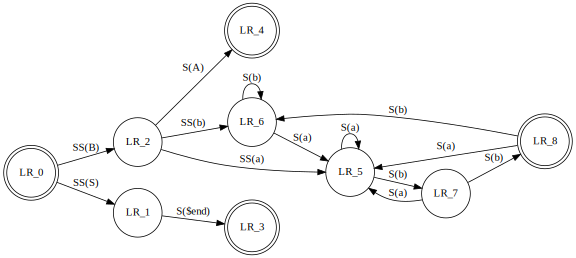

In [58]:
f = Digraph('finite_state_machine', filename='fsm.gv')
f.attr(rankdir='LR', size='8,5')
f.attr('node', shape='doublecircle')
f.node('LR_0'); f.node('LR_3')
f.node('LR_4');f.node('LR_8')
f.attr('node', shape='circle')
f.edge('LR_0', 'LR_2', label='SS(B)'); f.edge('LR_0', 'LR_1', label='SS(S)')
f.edge('LR_1', 'LR_3', label='S($end)'); f.edge('LR_2', 'LR_6', label='SS(b)')
f.edge('LR_2', 'LR_5', label='SS(a)'); f.edge('LR_2', 'LR_4', label='S(A)')
f.edge('LR_5', 'LR_7', label='S(b)'); f.edge('LR_5', 'LR_5', label='S(a)')
f.edge('LR_6', 'LR_6', label='S(b)'); f.edge('LR_6', 'LR_5', label='S(a)')
f.edge('LR_7', 'LR_8', label='S(b)'); f.edge('LR_7', 'LR_5', label='S(a)')
f.edge('LR_8', 'LR_6', label='S(b)'); f.edge('LR_8', 'LR_5', label='S(a)')
f

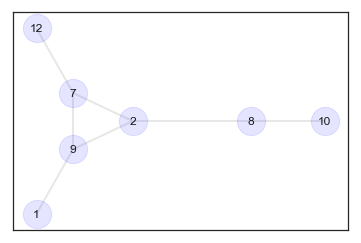

In [59]:
# Hapus Vertex/Edges
G.remove_node(19)
G.remove_edge(1, 2)

pos=nx.spectral_layout(G) # Spectral

nx.draw_networkx_nodes(G,pos, alpha=0.1,node_color='blue',node_size=800) # Gambar Vertex
nx.draw_networkx_edges(G,pos,width=2, alpha=0.1) # Gambar edges
nx.draw_networkx_labels(G,pos, size=1000) #Gambar Label Nodes
plt.show() # Show the graph

In [62]:
# Degree
G.degree[8]

2

## Membangun Graph

## Menambahkan vertex, node, dan weights

In [ ]:
G = nx.Graph() # Graph Kosong
G

In [ ]:
G.nodes(), G.edges()

In [ ]:
# ini adalah cara sederhana menambahkan node ke graph satu persatu
G.add_node(1)
G.add_node(99)
G.add_node(1) # "Himpunan"
print(G.nodes())

In [ ]:
# ini cara menambahkan array of vertices ke Graph kita
V = [1,2,5,6,8,33,65,88] # vertices

for vertex in V:
  G.add_node(vertex)
print( G.nodes() )
print( G.edges() )

In [ ]:
# ini cara menambahkan Edge secara manual satu per satu
G.add_edge(5, 8)
G.add_edge(8, 65)
print( G.nodes() )
print( G.edges() )

In [ ]:
# Kita bisa menambahkan edge walaupun di Graph kita belum ada vertexnya, vertex tersebut akan automatis ditambahkan ke graphnya
# ini cara menambahkan Edge secara manual satu per satu
# misal di contoh ini vertex 77 dan vertex "A" tidak ada sebelumnya di Graph G
G.add_edge(77, 8)
G.add_edge('Depok', 88)
print( G.nodes() )
print( G.edges() )

In [ ]:
# ini memahami bagaimana looping atas Array dari pasangan terurut dilakukan di python
E = [(1,33), (1,88), (6,88), (2,5), (2,8)]

for sisi in E:
  print(sisi[0])

for sisi in E:
  print(sisi[1])

In [ ]:
# Ini adalah cara menambahkan Edge di Graph dengan loop
for sisi in E:
  G.add_edge(sisi[0], sisi[1])
  
print( G.nodes() )
print( G.edges() )

In [ ]:
plt.subplots(figsize=(12,8))


pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos) # ini sekedar menggambar noktah vertex
nx.draw_networkx_labels(G,pos) # ini kemudian memberikan label di setiap vertex pada langkah sebelumnya
nx.draw_networkx_edges(G,pos) # ini menggambar edge di graph G
plt.show()

In [ ]:
# Cara lain

G = nx.Graph() # Graph Kosong Baru
V = [1, 2, 7, 9, 12, 19] # Bisa juga string, misal "A" atau nama "Budi"
E = [(1,2), (2,19), (9,2), (9,1), (2,8), (8,10), (12,7),(7,2), (7,9)] # Perhatikan "8" dan "10" TIDAK ADA di V

G.add_nodes_from(V)
G.add_edges_from(E)

print('Banyak vertex = ', G.number_of_nodes())
print('Banyak Edges = ', G.number_of_edges())

In [ ]:
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos, alpha=0.8,node_color='green',node_size=800) # ini sekedar menggambar noktah vertex
nx.draw_networkx_labels(G,pos) # ini kemudian memberikan label di setiap vertex pada langkah sebelumnya
nx.draw_networkx_edges(G,pos) # ini menggambar edge di graph G
plt.show()

# Manipulasi graph: Menghapus Node atau sub-graph

In [ ]:
v = [7, 12, 19]
G.remove_nodes_from(v)

In [ ]:
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos, alpha=0.8,node_color='green',node_size=800) # ini sekedar menggambar noktah vertex
nx.draw_networkx_labels(G,pos) # ini kemudian memberikan label di setiap vertex pada langkah sebelumnya
nx.draw_networkx_edges(G,pos) # ini menggambar edge di graph G
plt.show()

## Remove Edges

In [ ]:
E = [(1,9)]
G.remove_edges_from(E)

In [ ]:
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos, alpha=0.8,node_color='green',node_size=800) # ini sekedar menggambar noktah vertex
nx.draw_networkx_labels(G,pos) # ini kemudian memberikan label di setiap vertex pada langkah sebelumnya
nx.draw_networkx_edges(G,pos, edge_color='blue') # ini menggambar edge di graph G
plt.show()

## Adding Graph weights/properties

In [63]:
V = ['Depok', 'Jakarta','Bogor','Bekasi', 'Tangerang']
Vluas = [12.3, 44.5, 1.2, 0.6, 23] # contoh parameter "luas"

E = [('Depok','Bogor'), ('Jakarta','Bekasi'), ('Bekasi','Bogor'),('Depok','Bekasi'),('Tangerang','Bekasi')] # ini adalah edgenya
Ejrk = [22.4, 1.2, 5.6, 7.8, 9] # ini "contoh" nanti jadi parameter ke-2 dari setiap Edge di E


G = nx.Graph() # graph sebelumnya tertimpa dan jadi Graph kosong kembali
# Kemudian kita akan tambahkan vertex, edge, beserta setiap parameter yg didefinisikan di atas ke graph G
for vertex, area in zip(V, Vluas):
  G.add_node(vertex, luas=area) # nama variable parameter di setiap vertexnya di contoh ini adalah "waktu" dan "orang"
  
for sisi, dist in zip(E, Ejrk):
  G.add_edge(sisi[0], sisi[1], jarak=dist)

print( G.nodes() )
print( G.edges() )
print('Luas Depok = ', G.nodes['Depok']['luas'])

['Depok', 'Jakarta', 'Bogor', 'Bekasi', 'Tangerang']
[('Depok', 'Bogor'), ('Depok', 'Bekasi'), ('Jakarta', 'Bekasi'), ('Bogor', 'Bekasi'), ('Bekasi', 'Tangerang')]
Luas Depok =  12.3


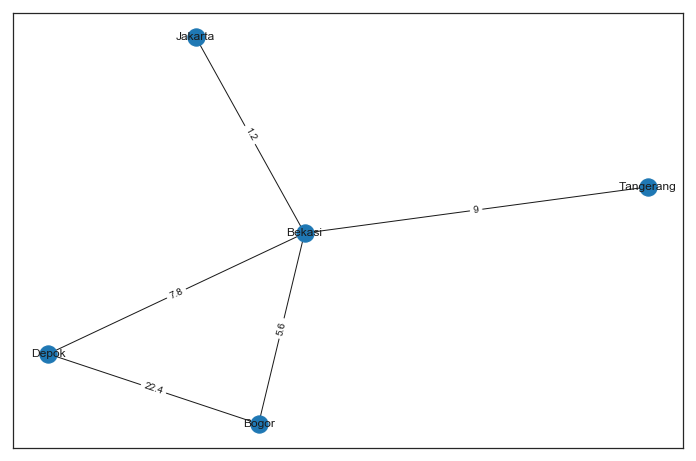

In [64]:
plt.subplots(figsize=(12,8))

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos) # ini sekedar menggambar noktah vertex
nx.draw_networkx_labels(G,pos) # ini kemudian memberikan label di setiap vertex pada langkah sebelumnya
nx.draw_networkx_edges(G,pos) # ini menggambar edge di graph G
nx.draw_networkx_edge_labels(G,pos,edge_labels=nx.get_edge_attributes(G,'jarak')) # ini label dari edgenya
plt.show()

<h1 id="Degree/Derajat-Vertex">Degree/Derajat Vertex</h1>

<p><img alt="" src="images/degree_vertex_graph.png" style="width: 700px; height: 374px;" /></p>

In [66]:
d = nx.degree(G)
d

DegreeView({'Depok': 2, 'Jakarta': 1, 'Bogor': 2, 'Bekasi': 4, 'Tangerang': 1})

In [67]:
[d[node] for node in G.nodes()]

[2, 1, 2, 4, 1]

## Menggunakan degree untuk membuat gambar graph yang lebih baik

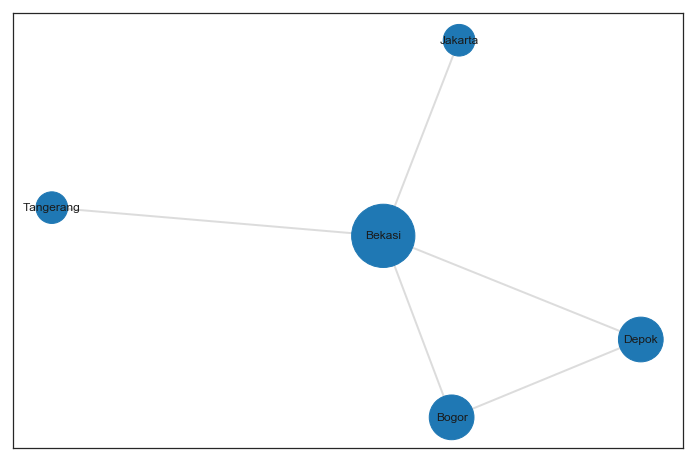

In [68]:
plt.subplots(figsize=(12,8))

pos = nx.spring_layout(G) # Spring LayOut

D = [d[node]*1000 for node in G.nodes()]
nx.draw_networkx_nodes(G,pos,node_size=D) # Gambar Vertex
nx.draw_networkx_edges(G,pos,width=2,alpha=0.15) # Gambar edges
nx.draw_networkx_labels(G,pos) #Gambar Label Nodes
plt.show() # Show the graph

## Menambahkan informasi warna

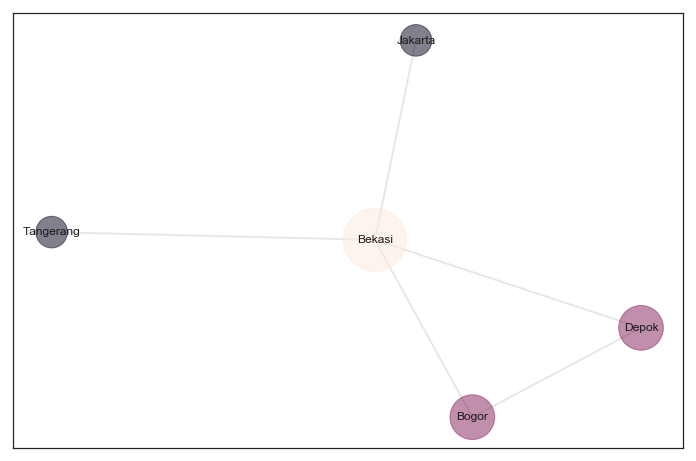

In [69]:
plt.subplots(figsize=(12,8))

warna = D
pos = nx.spring_layout(G) # Spring LayOut
nx.draw_networkx_nodes(G,pos, node_color=warna,node_size=D, alpha=0.5) # Gambar Vertex
nx.draw_networkx_edges(G,pos,width=2,alpha=0.1) # Gambar edges
nx.draw_networkx_labels(G,pos) #Gambar Label Nodes
plt.show() # Show the graph

<h1 id="(Shortest)-Path">(Shortest) Path</h1>

<p><img alt="" src="images/shortest_path.png" style="width: 690px; height: 414px;" /></p>

In [71]:
SP = nx.shortest_path(G, source='Tangerang', target='Depok')
SP

['Tangerang', 'Bekasi', 'Depok']

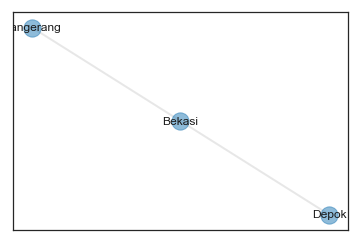

In [72]:
H = G.subgraph(SP)

pos = nx.spring_layout(H) # Spring LayOut
nx.draw_networkx_nodes(H,pos,alpha=0.5) # Gambar Vertex
nx.draw_networkx_edges(H,pos,width=2,alpha=0.1) # Gambar edges
nx.draw_networkx_labels(H,pos) #Gambar Label Nodes
plt.show() # Show the graph

<h1 id="Graph-From-Social-media">Graph From Social media</h1>

<h3 id="Mentions,-Followers,-Friends">Mentions, Followers, Friends</h3>

<p><img alt="" src="images/SNA_Graph_Types.png" style="width: 700px; height: 443px;" /></p>


In [73]:
# stopId, lemmaId = tau.LoadStopWords(lang='id') 
print('Loading Data  ... ')
T2 = tau.loadTweets(file='data/Tweets.json')
Usernames = [t['user']['screen_name'] for t in T2[:300]] # di SNA kita membutuhkan informasi ini
Tweets = [t['full_text'] for t in T2[:300]] # Tweet hasil crawling
# Caution jangan menghilangkan simbols untuk keperluan SNA
Tweets[:3]

Loading Data  ... 


['@reishaac @BTS_twt Makassar @BTS_twt \nBias ku adalah orang yg paling pede dan tukang promosi, disaat member lain pakai masker hanya dia sendiri yg tdk dengan alasan ingin seluruh dunia liat ketampanan dia, member tertua di grup yg membuat ku suka dan jatuh Cinta dlm sekali lihat,',
 'Hai(っ˘,˘)っ amaoell  AyoBantu Retweet &amp; Cekidot TokoTamz pinBB:2BB19B17 Jual Sepatu Baju Aksesoris Cewek di Makassar',
 'Hey(~´▿`)~ chandra76203047  AyoBantu Retweet &amp; Cekidot TokoTamz pinBB:2BB19B17 Jual Sepatu Baju Aksesoris Cewek di Makassar']

Please wait, building Graph .... 


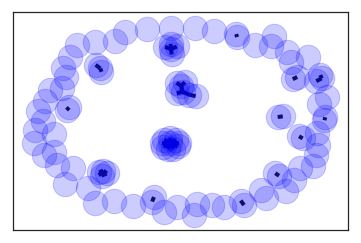

Finished. There are 101 nodes and 37 edges in the Graph.


In [74]:
# Draw the Tweet Graph
G = tau.Graph([Usernames,Tweets], Label = False, layOut='spring', plain=True) # layOut = spring, circular, random, shells, spectral

<h2>I. Centrality&nbsp;Analysis</h2>

<p>Bertujuan untuk menemukan pengguna yang paling berpengaruh dalam suatu topik pembicaraan di media sosial. Analisanya biasanya dilakukan melalui data graph dari hubungan jaringan pertemanan (follower/friend) antar pengguna atau komunikasi antar pengguna (mentions).</p>

<p><img alt="" src="images/8_SMA_Centrality.JPG" style="height: 400px ; width: 600px" /></p>


<h1 id="Centrality-by-Degree">Centrality by Degree</h1>

<p><img alt="" src="images/Degree_Centrality.png" style="width: 800px; height: 505px;" /></p>

## Apakah interpretasinya?

In [75]:
# Let's now examine, who are the most "important" users in this Graph?
Gt = tau.Centrality(G, N=10, method='degree', outliers=False, Label = True, layOut='spring')

Influencial Users: ['Indostransfer', 'guamokoo', 'PSM', 'ghoziyansyah', 'sigitigisigit', 'tonjel_', 'idntimes', 'tantemerry420', 'santuuyyyyyy', 'NugePratama47']
Influencial Users Scores: [0.09 0.04 0.03 0.03 0.03 0.02 0.02 0.02 0.02 0.02]


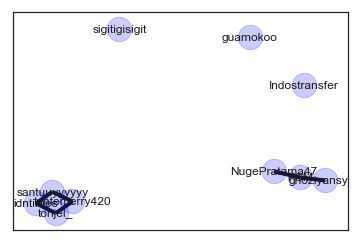

In [76]:
plot = tau.drawGraph(Gt, True, layOut='spring')

<h1 id="Closeness-Centrality">Closeness Centrality</h1>

<p><img alt="" src="images/closeness_centrality.png" style="width: 700px; height: 320px;" /></p>


In [77]:
Gt = tau.Centrality(G, N=10, method='closeness', outliers=False, Label = True, layOut='spring')

Influencial Users: ['Indostransfer', 'AdutRVS', 'hutriady', 'ddamkess', 'ramafadillaa', 'Vicar_Alexander', 'RivalMhmmd', 'RB_Famiglia', 'anaktimurr_', 'sulaimanurul_']
Influencial Users Scores: [0.09       0.04764706 0.04764706 0.04764706 0.04764706 0.04764706
 0.04764706 0.04764706 0.04764706 0.04764706]


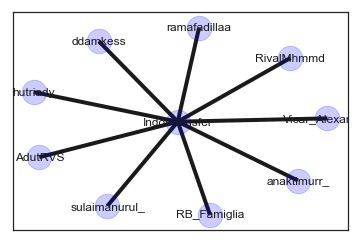

In [78]:
plot = tau.drawGraph(Gt, True, layOut='spring')

<h1 id="Betweenness-Centrality">Betweenness Centrality</h1>

<p><img alt="" src="images/betweeness_Centrality.png" style="width: 700px; height: 368px;" /></p>


In [104]:
Gt = tau.Centrality(G, N=10, method='betweeness', outliers=False, Label = True, layOut='spring')

Influencial Users: ['Indostransfer', 'PSM', 'ghoziyansyah', 'guamokoo', 'NugePratama47', 'andkjrmdhn', 'senoritae92', 'tonjel_', 'idntimes', 'tantemerry420']
Influencial Users Scores: [0.00727273 0.00222222 0.00181818 0.00121212 0.0010101  0.00020202
 0.00020202 0.00010101 0.00010101 0.00010101]


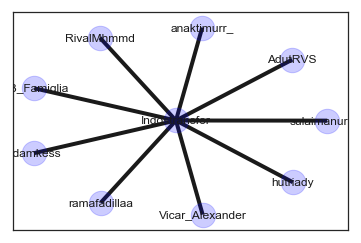

In [80]:
plot = tau.drawGraph(Gt, True, layOut='spring')

# Eigenvector Centrality

<p><img alt="" src="images/Eigenvector_Centrality_1.png" style="width: 685px; height: 430px;" /></p>

### Digunakan juga oleh Google dalam Algoritma PageRank-nya untuk menentukan halaman web terpenting.

<p><img alt="" src="images/Eigenvector_Centrality_0_.png" style="width: 685px; height: 430px;" /></p>

In [81]:
Gt = tau.Centrality(G, N=10, method='eigen', outliers=False, Label = True, layOut='spring')

Influencial Users: ['Indostransfer', 'sulaimanurul_', 'ddamkess', 'AdutRVS', 'hutriady', 'ramafadillaa', 'Vicar_Alexander', 'anaktimurr_', 'RB_Famiglia', 'RivalMhmmd']
Influencial Users Scores: [0.70710678 0.23570226 0.23570226 0.23570226 0.23570226 0.23570226
 0.23570226 0.23570226 0.23570226 0.23570226]


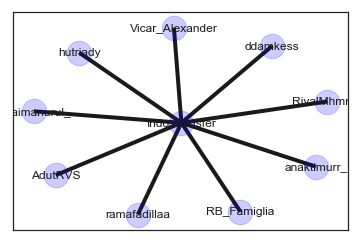

In [82]:
plot = tau.drawGraph(Gt, True, layOut='spring')

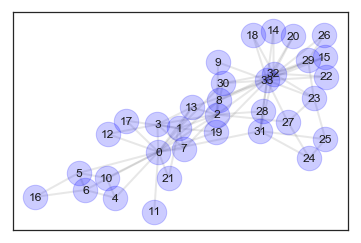

In [83]:
# Menggunakan centrality measure untuk merubah tampilan Graph
## Contoh dengan graph generators https://networkx.github.io/documentation/networkx-1.10/reference/generators.html

#g = nx.dorogovtsev_goltsev_mendes_graph(3)
g = nx.karate_club_graph()

pos = nx.spring_layout(g) # Spring LayOut
nx.draw_networkx_nodes(g,pos, alpha=0.2,node_color='blue',node_size=600) # Gambar Vertex
nx.draw_networkx_edges(g,pos,width=2,alpha=0.1) # Gambar edges
nx.draw_networkx_labels(g,pos) #Gambar Label Nodes
plt.show() # Show the graph

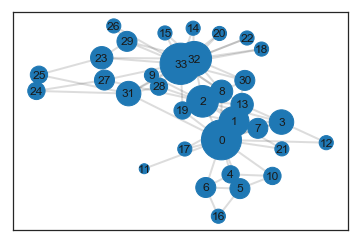

In [84]:
# Menggunakan Centrality measure (misal degree) untuk merubah ukuran node

K = 100 # Scale factor
d = nx.degree(g) 
d = [d[node]*K for node in g.nodes()]

pos = nx.spring_layout(g) # Spring LayOut
nx.draw_networkx_nodes(g,pos,node_size=d) # Gambar Vertex
nx.draw_networkx_edges(g,pos,width=2,alpha=0.15) # Gambar edges
nx.draw_networkx_labels(g,pos) #Gambar Label Nodes
plt.show() # Show the graph

In [85]:
# Menggunakan tingkat "kepentingan" sebagai warna
ranking = nx.degree_centrality(g)
warna = list(ranking.values())
print(warna)

[0.48484848484848486, 0.2727272727272727, 0.30303030303030304, 0.18181818181818182, 0.09090909090909091, 0.12121212121212122, 0.12121212121212122, 0.12121212121212122, 0.15151515151515152, 0.06060606060606061, 0.09090909090909091, 0.030303030303030304, 0.06060606060606061, 0.15151515151515152, 0.06060606060606061, 0.06060606060606061, 0.06060606060606061, 0.06060606060606061, 0.06060606060606061, 0.09090909090909091, 0.06060606060606061, 0.06060606060606061, 0.06060606060606061, 0.15151515151515152, 0.09090909090909091, 0.09090909090909091, 0.06060606060606061, 0.12121212121212122, 0.09090909090909091, 0.12121212121212122, 0.12121212121212122, 0.18181818181818182, 0.36363636363636365, 0.5151515151515151]


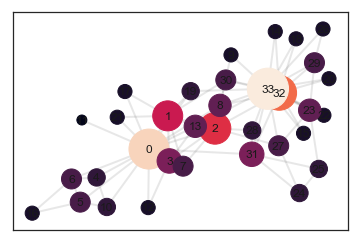

In [86]:
pos = nx.spring_layout(g) # Spring LayOut
nx.draw_networkx_nodes(g,pos, node_color=warna,node_size=d) # Gambar Vertex
nx.draw_networkx_edges(g,pos,width=2,alpha=0.1) # Gambar edges
nx.draw_networkx_labels(g,pos) #Gambar Label Nodes
plt.show() # Show the graph

<h1 id="Summary">Summary</h1>

<p><img alt="" src="images/Centrality_Interpretations.png" style="width: 659px; height: 349px;" /></p>

### Coba diskusikan optimal use case dari masing-masing metric ini.

<h2>II. Community Detection (CD)</h2>

<p>CD dilakukan pada data jaringan media sosial untuk menemukan komunitas-komunitas dalam pertemanan atau pembicaraan di media sosial. Secara sederhana CD dapat dimengerti sebagai proses "semacam clustering" (pengelompokan) , namun atas suatu graph.</p>

<img alt="" src="images/8_SMA_Community.JPG" style="height: 400px ; width: 600px" />


# Bipartition (Bisection) Partitioning

* <img alt="" src="images/KL_Algorithms.png" />
* This algorithm paritions a network into two sets by iteratively swapping pairs of nodes to reduce the edge cut between the two sets.
* https://www.youtube.com/watch?v=MMlf66PQdN8
* Paper: Kernighan, B. W.; Lin, Shen (1970). “An efficient heuristic procedure for partitioning graphs.” Bell Systems Technical Journal 49: 291–307. Oxford University Press 2011.

In [91]:
B = nx.algorithms.community.kernighan_lin_bisection(G)
B

({'AdutRVS',
  'Aksesori_Korea',
  'AksesorisUnyu',
  'BelanjaMakassar',
  'CewekPopulerMks',
  'FashionTamz',
  'GirlsMakassar',
  'GirlyAksesoris',
  'Indostransfer',
  'InfoAksesoris',
  'JualanSis',
  'KopitesSulawesi',
  'LovelyGirlyOz',
  'MakassarGirls',
  'MakassarPromoo',
  'MakassarShopOL',
  'MakassarStyle',
  'MakassarUnyu',
  'Mks_FreeOngkir',
  'Mks_Lovers',
  'MyCandyPanLok',
  'NugePratama47',
  'Owl_Again1',
  'PSM',
  'RB_Famiglia',
  'RivalMhmmd',
  'SalshaaUpdates',
  'Sofiant39294084',
  'TanpaPolitik',
  'Vicar_Alexander',
  'WanitaMakassar',
  'YesMakassarShop',
  'aksesorismks',
  'alvin_mks',
  'anaktimurr_',
  'andiburhan77',
  'andyruspan',
  'axelsen',
  'ddamkess',
  'deflykairupan',
  'ghoziyansyah',
  'hutriady',
  'kabar_bolaindo',
  'mikytalekang',
  'mksgirlyshop',
  'olShopMks',
  'ramafadillaa',
  'sigitigisigit',
  'sulaimanurul_',
  'tribuntimur'},
 {'Aksesori_Trendi',
  'BTS',
  'BelanjaShop',
  'BigPrima',
  'DreamcatcherMks',
  'FreeOngkirMks',


In [92]:
warna = []
for v in B[0]:
    warna.append(1)
for v in B[1]:
    warna.append(2)

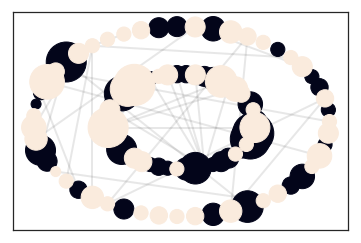

In [94]:
pos = nx.shell_layout(G, B)
nx.draw_networkx_nodes(G,pos, node_color=warna,node_size=d) # Gambar Vertex
nx.draw_networkx_edges(G,pos,width=2,alpha=0.1) # Gambar edges
#nx.draw_networkx_labels(G,pos) #Gambar Label Nodes
plt.show() # Show the graph

In [90]:
# Bipartite partitioning on our social media Graph
G_bip = nx.algorithms.community.kernighan_lin_bisection(G)
G_bip

({'Aksesori_Trendi',
  'BTS',
  'BelanjaMakassar',
  'BigPrima',
  'GirlsMakassar',
  'GirlyAksesoris',
  'InfoAksesoris',
  'JualanBro',
  'JualanSis',
  'KopitesSulawesi',
  'MakassarGirls',
  'MakassarShopOL',
  'MakassarStyle',
  'MakassarTrend',
  'MakassarWanita',
  'MksCuteShop',
  'Mks_FreeOngkir',
  'Mks_Lovers',
  'Mr_Didie01',
  'MyCandyPanLok',
  'NugePratama47',
  'OS_Makassar',
  'Owl_Again1',
  'PSM',
  'PromoShopMks',
  'ReadyStock_Mks',
  'Shopaholic_Mks',
  'SulSelSatu',
  'TerkiniWanita',
  'adhietdharma',
  'agakarebaa',
  'ajiflorishouse',
  'aksesorismantap',
  'alvin_mks',
  'andiburhan77',
  'andkjrmdhn',
  'andyruspan',
  'axelsen',
  'deflykairupan',
  'ghoziyansyah',
  'ilaailhami',
  'itsssbaarrbitjj',
  'kegblgnunfaedh',
  'loncyrimaa',
  'mikytalekang',
  'olShopMks',
  'reishaac',
  'riwatigis',
  'sarippeh',
  'senoritae92'},
 {'AdutRVS',
  'Aksesori_Korea',
  'AksesorisUnyu',
  'BelanjaShop',
  'CewekPopulerMks',
  'DreamcatcherMks',
  'FashionTamz',
  

<p><img alt="" src="images/Partitioning_VS_Clustering_Graph.png" style="width: 800px; height: 428px;" /></p>

# Graph Clustering via "Modularity"

* Modules biasa disebut juga groups, clusters atau communities
* Terdapat berbagai cara dalam menghitung "Modularity" (contoh dibawah)
* Graph with high modularity have dense connections between the nodes within "modules" but sparse connections between nodes in different modules.
* Salah satu metodenya : Greedy Modularity Maximization (GMM)
* GMM begins with each node in its own community and joins the pair of communities that most increases modularity until no such pair exists.
* Clauset, A., Newman, M. E., & Moore, C. “Finding community structure in very large networks.” Physical Review E 70(6), 2004.
* Other resources for study: https://slideplayer.com/slide/7050174/

<img alt="" src="images/Graph_Modularity.png" />

In [99]:
# WARNING!!!... Hanya bisa jika networkX versi 2.2 ke atas 
M = nx.algorithms.community.greedy_modularity_communities(G)
print(M)

[frozenset({'hutriady', 'sulaimanurul_', 'Indostransfer', 'AdutRVS', 'RivalMhmmd', 'RB_Famiglia', 'anaktimurr_', 'ddamkess', 'Vicar_Alexander', 'ramafadillaa'}), frozenset({'ghoziyansyah', 'andiburhan77', 'KopitesSulawesi', 'NugePratama47', 'PSM', 'deflykairupan', 'andyruspan'}), frozenset({'guamokoo', 'abdieljustin6', 'PutroAdijaya', 'afifanahdaaa', 'WildanAhma'}), frozenset({'tantemerry420', 'santuuyyyyyy', 'tonjel_', 'idntimes'}), frozenset({'BTS', 'reishaac', 'senoritae92'}), frozenset({'itsssbaarrbitjj', 'kegblgnunfaedh', 'andkjrmdhn'}), frozenset({'TanpaPolitik', 'sigitigisigit'}), frozenset({'MyCandyPanLok', 'Owl_Again1'}), frozenset({'bhinneka', 'Non1nfo'}), frozenset({'riwatigis', 'BigPrima'}), frozenset({'axelsen', 'alvin_mks'}), frozenset({'ilaailhami', 'adhietdharma'}), frozenset({'agakarebaa', 'MakassarTrend'}), frozenset({'Sofiant39294084', 'tribuntimur'}), frozenset({'sarippeh', 'loncyrimaa'}), frozenset({'TerkiniGaul'}), frozenset({'TerkiniWanita'}), frozenset({'Terkini

In [100]:
W = []
warna = 1
for module in M:
    for node in module:
        W.append(warna)
    warna = warna +1
print(W)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66]


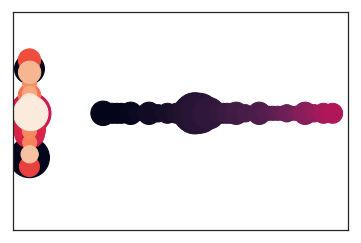

In [102]:
pos = nx.shell_layout(G, M)
nx.draw_networkx_nodes(G,pos, node_color=W,node_size=d) # Gambar Vertex
nx.draw_networkx_edges(G,pos,width=2,alpha=0.1) # Gambar edges
#nx.draw_networkx_labels(g,pos) #Gambar Label Nodes
plt.show() # Show the graph

In [98]:
# Communities on our social media Graph
M_Mod = nx.algorithms.community.greedy_modularity_communities(G)
print(M_Mod)

[frozenset({'hutriady', 'sulaimanurul_', 'Indostransfer', 'AdutRVS', 'RivalMhmmd', 'RB_Famiglia', 'anaktimurr_', 'ddamkess', 'Vicar_Alexander', 'ramafadillaa'}), frozenset({'ghoziyansyah', 'andiburhan77', 'KopitesSulawesi', 'NugePratama47', 'PSM', 'deflykairupan', 'andyruspan'}), frozenset({'guamokoo', 'abdieljustin6', 'PutroAdijaya', 'afifanahdaaa', 'WildanAhma'}), frozenset({'tantemerry420', 'santuuyyyyyy', 'tonjel_', 'idntimes'}), frozenset({'BTS', 'reishaac', 'senoritae92'}), frozenset({'itsssbaarrbitjj', 'kegblgnunfaedh', 'andkjrmdhn'}), frozenset({'TanpaPolitik', 'sigitigisigit'}), frozenset({'MyCandyPanLok', 'Owl_Again1'}), frozenset({'bhinneka', 'Non1nfo'}), frozenset({'riwatigis', 'BigPrima'}), frozenset({'axelsen', 'alvin_mks'}), frozenset({'ilaailhami', 'adhietdharma'}), frozenset({'agakarebaa', 'MakassarTrend'}), frozenset({'Sofiant39294084', 'tribuntimur'}), frozenset({'sarippeh', 'loncyrimaa'}), frozenset({'TerkiniGaul'}), frozenset({'TerkiniWanita'}), frozenset({'Terkini

<p><img alt="" src="images/Gephi.jpg" style="width: 580px; height: 358px;" /></p>


# <center><font color="blue"> End of Module 10 : End of Workshop

<hr />
<p><img alt="" src="images/8_twitter_140_char.jpg" /></p>